In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


folder_path="../station_AAU_rate_59677090"
with open(f"{folder_path}/rs.pickle", 'rb') as f:
    Rsc = pickle.load(f)
f.close()
with open(f"{folder_path}/rd.pickle", "rb") as f:
    Rdl= pickle.load(f)
f.close()
with open(f"{folder_path}/gwr.pickle", "rb") as f:
    Rgw=pickle.load(f)
f.close()
Rsc=Rsc
print(Rsc, Rdl, Rgw)
Rdl=Rdl/Rsc
Rgw=Rgw/Rsc
Rsc=1
print(Rsc, Rdl, Rgw)


277803676.4730755 3574016929.4285855 960000000.0
1 12.865261449392575 3.455677808832175


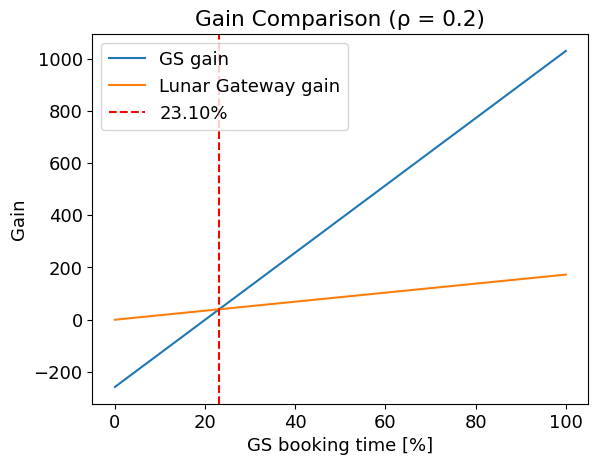

In [2]:
from scipy.interpolate import interp1d

# Rdl=3
# Rgw=1
M=100
N=np.linspace(0, M, 100)
rho=0.2
beta=0.5
Gain_gs=Rdl*(N-rho*M)
# Gain_gs=Rdl*M*(N-rho)
Gain_gw=beta*Rgw*(N)
# Gain_gw=Rgw *N * rho
# Interpolate the difference between Gain_gs and Gain_gw
diff = Gain_gs - Gain_gw
interpolator = interp1d(N, diff, kind='linear')
cross_value = interp1d(diff, N, kind='linear')(0)  # Find where the difference is zero
plt.rcParams.update({'font.size': 13})
plt.plot(N, Gain_gs, label="GS gain")
plt.plot(N, Gain_gw, label="Lunar Gateway gain")
plt.axvline(cross_value, color='red', linestyle='--', label=f'{cross_value:.2f}%')
plt.legend(loc="upper left")
plt.title(f"Gain Comparison (ρ = {rho})")
plt.xlabel("GS booking time [%]")
plt.ylabel("Gain")
plt.savefig(f"gain_comparison_{rho}_{beta}.pdf", format="pdf", bbox_inches="tight")
plt.show()
